## General stuff

In [1]:
import time

In [2]:
def time_function(f):
    start = time.time()
    val = f
    end = time.time()
    return end-start

## Newton's method

In [3]:
def newtons_method(f,df,x0,tol=10e-5,max_it=1000):
    i=0
    xn = x0
    while i<max_it and abs(f(xn))>tol:
        if df(xn)==0: print("Derivative is zero"); break
        else: xn -= f(xn)/df(xn)
        i+=1;
    return xn

## Implicit midpoint

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [29]:
omega = 2*np.pi*0.5
kappa = -0.8
def f(t,x): return kappa*x

In [30]:
def implicit_midpoint(f,y0,t0,tf,h=0.01):
    N = int((tf-t0)/h)+1
    t = np.linspace(t0,tf,N)
    y = np.zeros(N)
    y[0] = y0
    
    for n in range(N-1):
        tn = t[n]; yn = y[n]
        y_est = yn+h*f(tn,yn)
        g = lambda x: x-yn-h*f(tn+h/2,yn/2+x/2)
        dg = lambda x: 1-f(tn,x)
        y[n+1] = newtons_method(g,dg,y_est)
         
    return t,y

In [31]:
y0 = 5
t0 = 0
tf = 10
t,y_num = implicit_midpoint(f,y0,t0,tf,0.5)
N = len(t); y_sol = np.zeros(N);
for n in range(N): y_sol[n] = y0*np.exp(kappa*t[n])

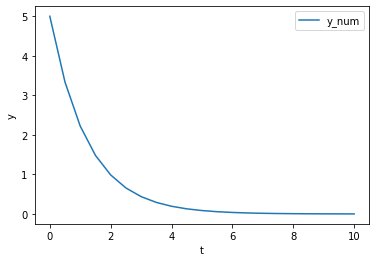

In [32]:
plt.plot(t,y_num,label="y_num")
#plt.plot(t,y_sol,label="y_sol")
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()